### Load event logs

In [146]:
# basic configuration
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import matplotlib.pyplot as plt
from pmlab_lite.helper.io import xes
import numpy as np
from collections import Counter
from pprint import pprint
import math

# import event logs
log_file_berlin = './WP18_Berlin_Antrag.xes'
log_berlin = xes.import_xes(log_file_berlin)
print('Load log for Berlin Antrag WP18: %s traces.' %len(log_berlin.get_traces()))

log_file_bawue = './WP16_BadenWürttemberg_Antrag.xes'
log_bawue = xes.import_xes(log_file_bawue)
print('Load log for Baden-Württemberg Antrag WP16: %s traces.' %len(log_bawue.get_traces()))

log_file_bran = './WP6_Brandenburg_Antrag.xes'
log_bran = xes.import_xes(log_file_bran)
print('Load log for Brandenburg Antrag WP6: %s traces.' %len(log_bran.get_traces()))



Processing log...


365308it [00:01, 253694.04it/s]


Load log for Berlin Antrag WP18: 1248 traces.
Processing log...


319250it [00:01, 267279.72it/s]


Load log for Baden-Württemberg Antrag WP16: 3126 traces.
Processing log...


136510it [00:00, 289899.44it/s]

Load log for Brandenburg Antrag WP6: 722 traces.


### Traces

Berlin Antrag WP18 :The longest trace contains 27 events. The shortest trace: 1 events.


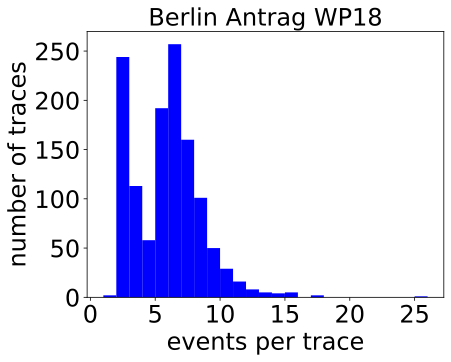

Baden-Württemberg Antrag WP16 :The longest trace contains 11 events. The shortest trace: 1 events.


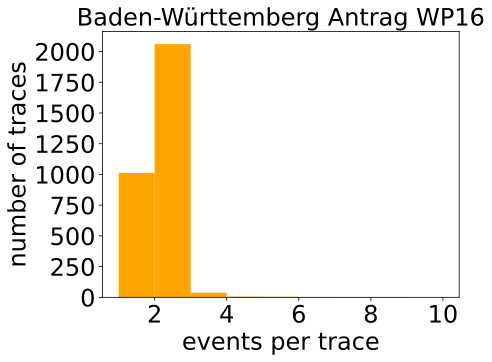

Brandenburg Antrag WP6 :The longest trace contains 17 events. The shortest trace: 1 events.


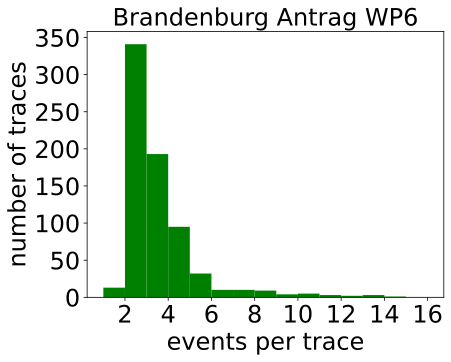

In [156]:
def traces(log, log_name, color):
    trace_length = []

    for trace in log.get_traces():
        trace_length.append(len(trace))

    max_length = np.max(trace_length)
    min_length = np.min(trace_length)

    print(log_name, ':The longest trace contains %s events. The shortest trace: %s events.' %(max_length, min_length))
        
    plt.hist(trace_length, bins=range(min_length, max_length, 1), color=color)
    plt.title(log_name, fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('events per trace', fontsize=24)
    plt.ylabel('number of traces', fontsize=24)
    plt.savefig(log_name + "_traces.svg")
    plt.show()

traces(log_berlin, 'Berlin Antrag WP18', 'blue')
traces(log_bawue, 'Baden-Württemberg Antrag WP16', 'orange')
traces(log_bran, 'Brandenburg Antrag WP6', 'green')



### Trace variants

In [148]:
def variants(log, log_name):
    trace_list = []
    for trace in log.get_traces():
        events = []
        for event in trace:
            events.append(event['concept:name'])
            
        trace_list.append(tuple(events))
    trace_variants = set(trace_list)
    print(log_name, ': The log contains %s trace variants.' %len(trace_variants))
    return trace_list

trace_list_berlin = variants(log_berlin, 'Berlin Antrag WP18')
trace_list_bawue = variants(log_bawue, 'Baden-Württemberg Antrag WP16')
trace_list_bran = variants(log_bran, 'Brandenburg Antrag WP6')

Berlin Antrag WP18 : The log contains 222 trace variants.
Baden-Württemberg Antrag WP16 : The log contains 41 trace variants.
Brandenburg Antrag WP6 : The log contains 108 trace variants.


In [149]:
def variantsFrequency(log_name, trace_list):
    counter = [1]
    unique, counts = np.unique(trace_list, return_counts=True)
    counter = counts
    print(log_name)
    print('The most frequent trace variant is:', unique[np.argmax(counter)])
    print("Number of occurrences:", np.max(counter))

variantsFrequency('Berlin Antrag WP18', trace_list_berlin)
variantsFrequency('Baden-Württemberg Antrag WP16', trace_list_bawue)
variantsFrequency('Brandenburg Antrag WP6', trace_list_bran)

Berlin Antrag WP18
The most frequent trace variant is: ('Antrag', 'Behandlung im Plenum')
Number of occurrences: 244
Baden-Württemberg Antrag WP16
The most frequent trace variant is: ('Antrag und Stellungnahme', "['Beschlussempfehlung und Bericht', 'Beschlussempfehlungen und Berichte (Sammeldrucksache)']")
Number of occurrences: 1925
Brandenburg Antrag WP6
The most frequent trace variant is: ('Antrag', 'Beratung')
Number of occurrences: 220


/home/phillmann/mambaforge/lib/python3.9/site-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


### Trace start days

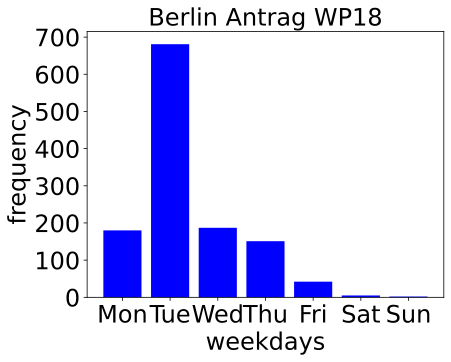

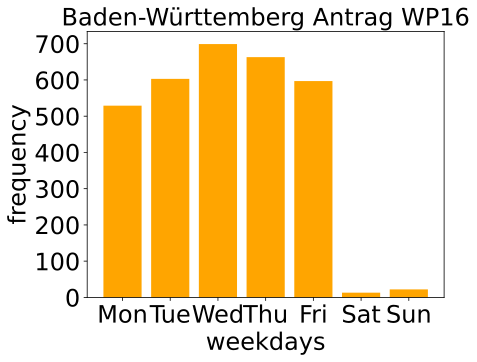

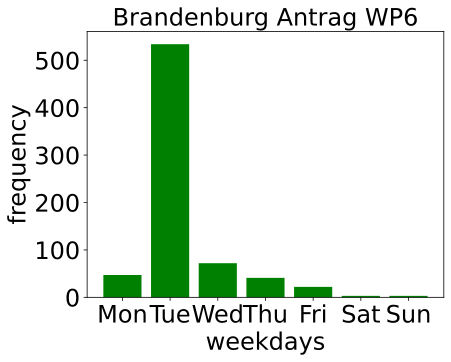

In [158]:
def trace_start_days(log, log_name, color):
    weekdays = []
    for trace in log.get_traces():
        first_e = trace[0]
        t0 = first_e['time:timestamp']
        weekday = t0.isoweekday()
        weekdays.append(weekday)

    data = np.bincount(weekdays)[1:]
    x_ticks = range(0,len(data), 1)
    plt.bar(x_ticks, data, color=color)
    plt.title(log_name, fontsize=24)
    plt.xlabel('weekdays', fontsize=24)
    plt.ylabel('frequency', fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    ax = plt.gca()
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.savefig(log_name + "_trace_start_days.svg")
    plt.show()

trace_start_days(log_berlin, 'Berlin Antrag WP18', 'blue')
trace_start_days(log_bawue, 'Baden-Württemberg Antrag WP16', 'orange')
trace_start_days(log_bran, 'Brandenburg Antrag WP6', 'green')

### Events

In [151]:
def events_fun(log, log_name): 
    events = [e for t in log.get_traces() for e in t]
    noOfEvents = len(events)
    print(log_name, ': The log contains %s events.\n' %noOfEvents)
    return events

events_berlin = events_fun(log_berlin, 'Berlin Antrag WP18')
events_bawue= events_fun(log_bawue, 'Baden-Württemberg Antrag WP16')
events_bran = events_fun(log_bran, 'Brandenburg Antrag WP6')

Berlin Antrag WP18 : The log contains 6785 events.

Baden-Württemberg Antrag WP16 : The log contains 5333 events.

Brandenburg Antrag WP6 : The log contains 2229 events.



In [152]:
def main_activites(events, log_name):
    noOfEventOccurrences = Counter([e['concept:name'] for e in events])
    sortedNoOfEventOccurrences = sorted(noOfEventOccurrences.items(), key=lambda x: x[1], reverse=True)

    print(log_name, ":")
    #print("Activity frequencies:")

    #for name, count in sortedNoOfEventOccurrences:
    #    print('Event "%s" occurs %s times.' %(name, count))



    percentage = 0.0
    activities = []
    activities_percentages = []
    for name, count in sortedNoOfEventOccurrences:
        percentage += count / len(events)
        activities.append(name)
        activities_percentages.append(count / len(events))
        if (len(activities) >= 8):
            break
        #if (percentage >= 0.90):
        #    break

    print("\n")
    print("Percentage of events covered by 4 main activities:", percentage)
    print("is covered by these", len(activities),"activities:", activities)


    print("\n")
    return (activities, activities_percentages)

main_activites_berlin, main_activities_percentages_berlin = main_activites(events_berlin, 'Berlin Antrag WP18')
main_activities_bawue, main_activities_percentages_bawue = main_activites(events_bawue, 'Baden-Württemberg Antrag WP16')
main_activities_bran, main_activities_percentages_bran = main_activites(events_bran, 'Brandenburg Antrag WP6')
print(main_activities_percentages_berlin)

Berlin Antrag WP18 :


Percentage of events covered by 4 main activities: 0.9957258658806188
is covered by these 8 activities: ['Behandlung im Plenum', 'Ausschussberatung', 'Antrag', 'Beschlussempfehlung', 'Mitteilung zur Kenntnisnahme (Folgedokument)', 'Mitteilung zur Kenntnisnahme (Zwischenbericht, Folgedokument)', 'Änderungsantrag', 'Mitteilung zur Kenntnisnahme (Schlussbericht, Folgedokument)']


Baden-Württemberg Antrag WP16 :


Percentage of events covered by 4 main activities: 0.9928745546596662
is covered by these 8 activities: ['Antrag und Stellungnahme', "['Beschlussempfehlung und Bericht', 'Beschlussempfehlungen und Berichte (Sammeldrucksache)']", 'Beschlussempfehlungen und Berichte (Sammeldrucksache)', 'Mitteilung', 'Antrag', 'Beschlussempfehlung und Bericht', 'Entschließungsantrag', 'Änderungsantrag']


Brandenburg Antrag WP6 :


Percentage of events covered by 4 main activities: 0.9161058770749215
is covered by these 8 activities: ['Antrag', 'Beratung', 'Beschluss', 'Ents

### Weekdays of activity occurrences

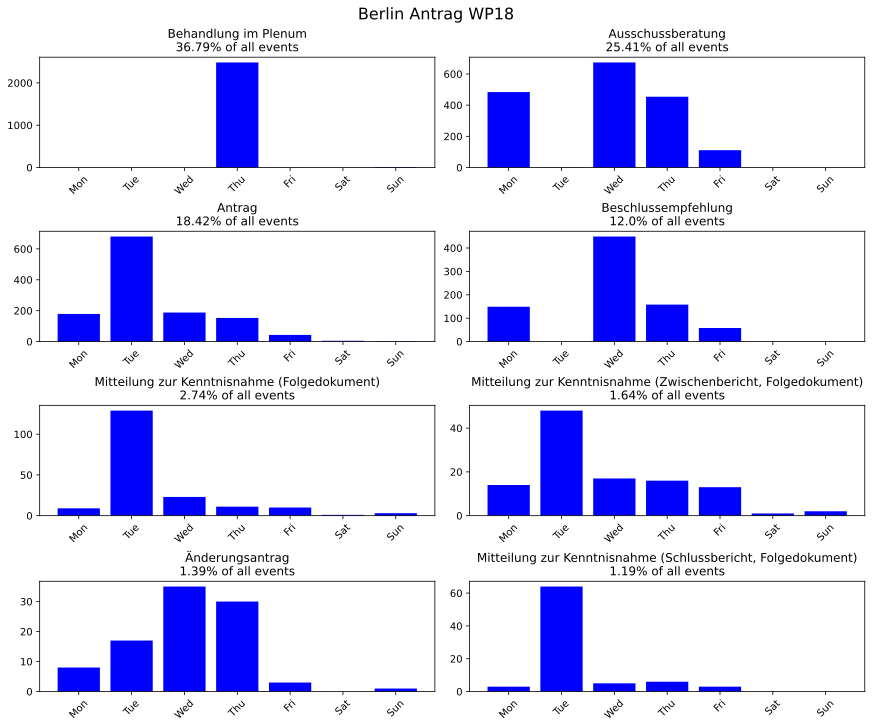

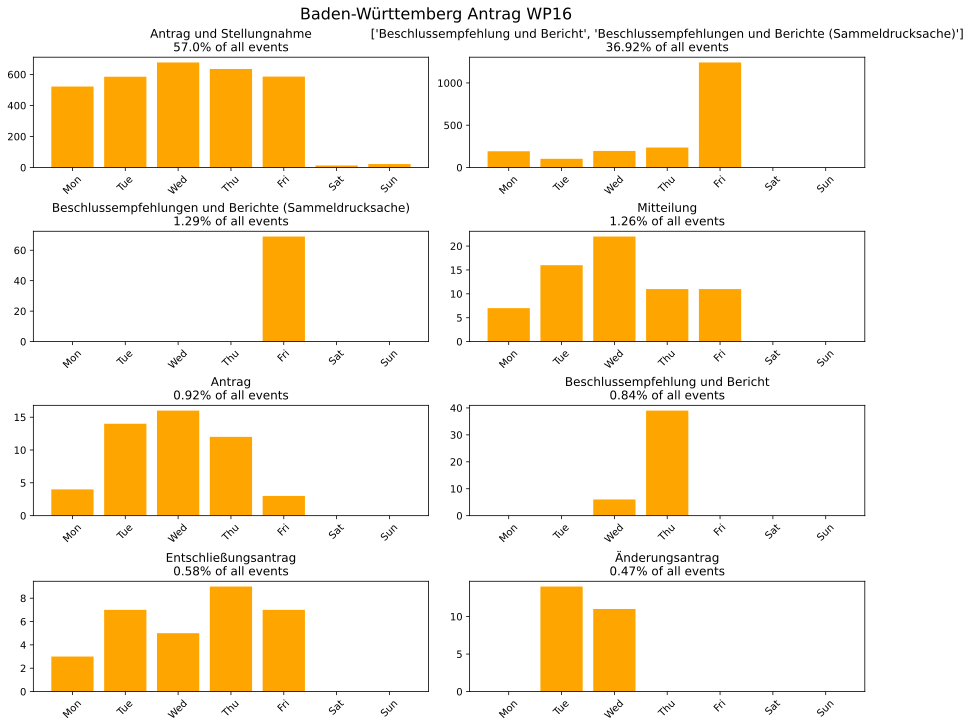

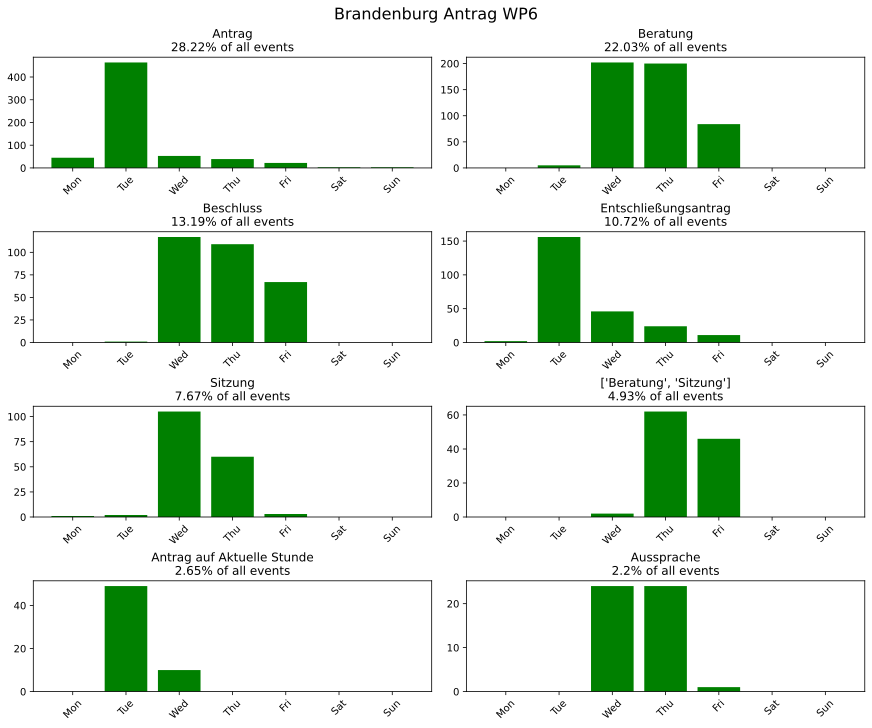

In [165]:
def weekday_occurrences(activities, activities_percentages, events, log_name, color):
    figHeight = 2.5 * math.ceil(len(activities)/2)
    if len(activities) < 4:
        noOfPlotsInRow = len(activities)
    else:
        noOfPlotsInRow = 2
    fig, ax = plt.subplots(math.ceil(len(activities)/2), noOfPlotsInRow, figsize=(12, figHeight), constrained_layout=True)
    ax = ax.flatten()
    fig.suptitle(log_name, fontsize=16)

    for idx, target_event in enumerate(list(activities)):
        weekdays = []
        
        for event in events:
            eventClass = (event['concept:name'])
            if (eventClass == target_event):
                t0 = event['time:timestamp']
                weekday = t0.isoweekday()
                weekdays.append(weekday)
        
        # plot
        data = np.bincount(weekdays, minlength=8)[1:]
        
        x_ticks = range(0, len(data), 1)
        ax[idx].bar(x_ticks, data, color=color)
        ax[idx].set_xticks(x_ticks)
        ax[idx].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
        ax[idx].set_title(target_event + "\n" + str(round(activities_percentages[idx]*100, 2)) + "% of all events")
    
    plt.savefig(log_name + "_weekdays_activities.svg")
    plt.show()

weekday_occurrences(main_activites_berlin, main_activities_percentages_berlin, events_berlin, 'Berlin Antrag WP18', 'blue')
weekday_occurrences(main_activities_bawue, main_activities_percentages_bawue, events_bawue, 'Baden-Württemberg Antrag WP16', 'orange')
weekday_occurrences(main_activities_bran, main_activities_percentages_bran, events_bran, 'Brandenburg Antrag WP6', 'green')